# 1. installing dependencies


In [ ]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np 
import os 
from matplotlib import pyplot as plt 
import time 
import mediapipe as mp

# 2. Useing MP holistic for keypoints


In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detections(img, model):
    img = cv2. cvtColor(img, cv2.COLOR_BGR2RGB) # COLOR CONVERSION (BLUE, GREEN, RED,"2", RED, BLUE, GREEN)
    
    img.flags.writeable = False  # Image is not writeable after that
    
    results = model.process(img) # Detecting image through mediapipeline 
    
    img.flags.writeable = True # Image is writeable after that 
    
    img = cv2. cvtColor(img, cv2.COLOR_RGB2BGR) # COLOR CONVERTION (RED, BLUE, GREEN, "2", BLUE, GREEN, RED)
    return img, results

In [5]:
def draw_landmarks(img, results):
    # this is drawing face landmark and updating it's colors and lines
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=int(1), circle_radius=int(1)),
                             mp_drawing.DrawingSpec(color=(0, 229, 255), thickness=int(1), circle_radius=int(1))
                             )
    
    # this is drawing our pose landmark
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=int(2), circle_radius=int(1)),
                             mp_drawing.DrawingSpec(color=(21, 72, 161), thickness=int(2), circle_radius=int(1))
                             )
            
            
    # this is drawing our left_hand landmark
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=int(2), circle_radius=int(1)),
                             mp_drawing.DrawingSpec(color=(0, 187, 255), thickness=int(2), circle_radius=int(1))
                             )
            
            
    
    # this is drawing our right_hand landmark
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=int(2), circle_radius=int(2)),
                             mp_drawing.DrawingSpec(color=(255, 162, 0), thickness=int(2), circle_radius=int(2))
                             )

In [6]:
# That code of line tell you which landmark connect to which landmark
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [7]:
# So basically what this line does is simple we can check that our function that what kind of value it is drawin' AND when run sometime that line it can give you error 'Invalid syntax' just remove and add question marks 
# Both question marks give you different details just try one and then both
mp_drawing.draw_landmarks??

In [ ]:
cap = cv2.VideoCapture(0) # If cv2 camera not pop-up change the index number and you'll be on your way
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as model: # Setting midiapip model and play with that confidence values
    while cap.isOpened():
        ret, frame = cap.read()
        img, results = mediapipe_detections(frame, model)
        print(results)
        draw_landmarks(img, results)
        cv2.imshow('openCV', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

In [9]:
results # Printing our landmarks

mediapipe.python.solution_base.SolutionOutputs

In [10]:
frame

array([[[ 30,  70,  73],
        [ 29,  74,  76],
        [ 25,  74,  76],
        ...,
        [ 86, 101, 103],
        [ 87, 100, 104],
        [ 87,  99, 103]],

       [[ 35,  71,  72],
        [ 34,  73,  75],
        [ 29,  71,  74],
        ...,
        [ 86, 102, 105],
        [ 85, 101, 104],
        [ 83,  98, 101]],

       [[ 38,  69,  73],
        [ 35,  69,  78],
        [ 31,  69,  81],
        ...,
        [ 85, 102, 105],
        [ 85, 101, 104],
        [ 84,  99, 103]],

       ...,

       [[119, 133, 132],
        [121, 136, 135],
        [119, 135, 134],
        ...,
        [102, 103, 113],
        [ 98, 100, 113],
        [100, 102, 116]],

       [[122, 134, 133],
        [121, 136, 135],
        [118, 137, 135],
        ...,
        [105, 105, 116],
        [103, 101, 117],
        [102, 100, 117]],

       [[120, 134, 133],
        [119, 137, 135],
        [116, 137, 135],
        ...,
        [102, 102, 114],
        [102, 103, 117],
        [100, 102, 116]]

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # That line will show you your image with body keypoints

# 3. Extracting values keypoints

In [289]:
# Concatenating into numpy array
each_landmark = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    each_landmark.append(test)

In [15]:
test

array([3.68931621e-01, 3.04826903e+00, 3.06125939e-01, 1.12448899e-04])

In [16]:
# Checking landmark for each values
results.pose_landmarks.landmark[0].x

0.5145696401596069

In [17]:
# Alternative way to looping through our array by list comprehensive
pose_landmark = np.array([[res.x, res.y, res.z, res.visibility]for arr in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

# For face landmark
face_landmark= np.array([[res.x, res.y, res.z]for arr in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(463*3)

# For left hand landmarks
left_h = np.array([[res.x, res.y, res.z]for arr in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# For right hand landmarks
right_h = np.array([[res.x, res.y, res.z]for arr in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
# Containing our landmarks into one function
def extract_keypoints(results):
    
    # Alternative way to looping through our array by list comprehensive
    pose_landmark = np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

    # For face landmark
    face_landmark= np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

    # For left hand landmarks
    left_h = np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    # For right hand landmarks
    right_h = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatenating each landmarks 
    return np.concatenate([pose_landmark, face_landmark, right_h, left_h])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test.shape

(1662,)

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.51456964,  0.42626923, -1.11590815, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup our folder for keypoints collections


In [23]:
DATA_PATH = os.path.join("MP_DATA")
action = np.array(['thankyou', 'loveyou', 'hello'])
np_sequence = 30
sequence_length = 30

In [24]:
for actions in action:
    for sequence in range(np_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, actions, str(sequence)))
        except:
            pass

# 5. Collecting keypoint for Training and Testing


In [ ]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for actions in action:
        for sequence in range(np_sequence):
            for num_frame in range(sequence_length):
                ret, frame = cap.read()
                img, results = mediapipe_detections(frame, holistic)
                print(results)
                draw_landmarks(img, results)
                if num_frame == 0:
                    cv2.putText(img, "STARTING COLLECTION", (120, 2000),
                                cv2.FONT_HERSHEY_SIMPLEX, ,(0,150,0), 2, cv2.LINE_AA)
                    cv2.putText(img, f'Collecting frames for {actions,sequence} video number',(15, 12),                               
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 160), 3, cv2.LINE_AA)
                    cv2.waitKey(3000)
                else:
                    cv2.putText(img, f'Collecting frames for {actions,sequence} video number',(15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 4, cv2.LINE_AA)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, actions, str(sequence), str(num_frame))
                np.save(npy_path, keypoints)
                    
                cv2.imshow('openCV', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [90]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Lable and Features


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
# Creating labels for our data (basically we are creating dictionary although)
label_map = {label:num for num, label in enumerate(action)}

In [27]:
label_map

{'thankyou': 0, 'loveyou': 1, 'hello': 2}

In [28]:
# We are creating two blank array's so sequence is gonna represent our x data AND labels array gonna represent our y data 
sequences, labels = [], [] 

for actions in action:
    for sequence in range(np_sequence):
        window=[]
        for num_frame in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, actions, str(sequence),"{}.npy".format(num_frame)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[actions])

In [29]:
x = np.array(sequences)

In [30]:
x.shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
# We are converting our labels in one-hot encoded representation, it's like binary because(1, 0, 0)represent THANKYOU, and (0, 1, 0) represent LOVEYOU, and (0, 0, 1)represent HELLO!
y = to_categorical(labels).astype(int)

In [33]:
y.shape

(90, 3)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [35]:
x_train.shape

(85, 30, 1662)

# 7. Build and Train LSTM Neural Network


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [134]:
log_dir = os.path.join("logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [135]:
# use that link https://developers.google.com/learn/pathways/tensorflow to understand better fundamentals of machine learning
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(action.shape[0], activation='softmax'))

In [136]:
action.shape[0]

3

In [247]:
res = [0.7, 0.2, 0.1]

In [246]:
action[np.argmax(res)]

'thankyou'

In [140]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=900, callbacks=[tb_callback])

In [188]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Pridictions


In [204]:
res = model.predict(x_test)

In [205]:
action[np.argmax(res[4])]

'thankyou'

In [206]:
action[np.argmax(y_test[4])]

'thankyou'

# 9. Save Weights


In [207]:
model.save('action.h5')

In [51]:
del model

In [208]:
model.load_weights('action.h5')

# 10. Evaluation Using Confusion Matrix and Accuracy


In [235]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [236]:
yhat = model.predict(x_test)

In [237]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [238]:
ytrue

[0, 0, 2, 2, 0]

In [239]:
multilabel_confusion_matrix(ytrue, yhat) # that line of code give you [TRUE NAGATIVE, FALSE POSITIVE, FALSE NAGATIVE, TRUE NAGATIVE], in two by two matrix

array([[[2, 0],
        [0, 3]],

       [[4, 1],
        [0, 0]],

       [[3, 0],
        [1, 1]]], dtype=int64)

In [242]:
accuracy_score(yhat, ytrue)

0.8

# 11. Test in Real Time

In [281]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, action, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, action[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

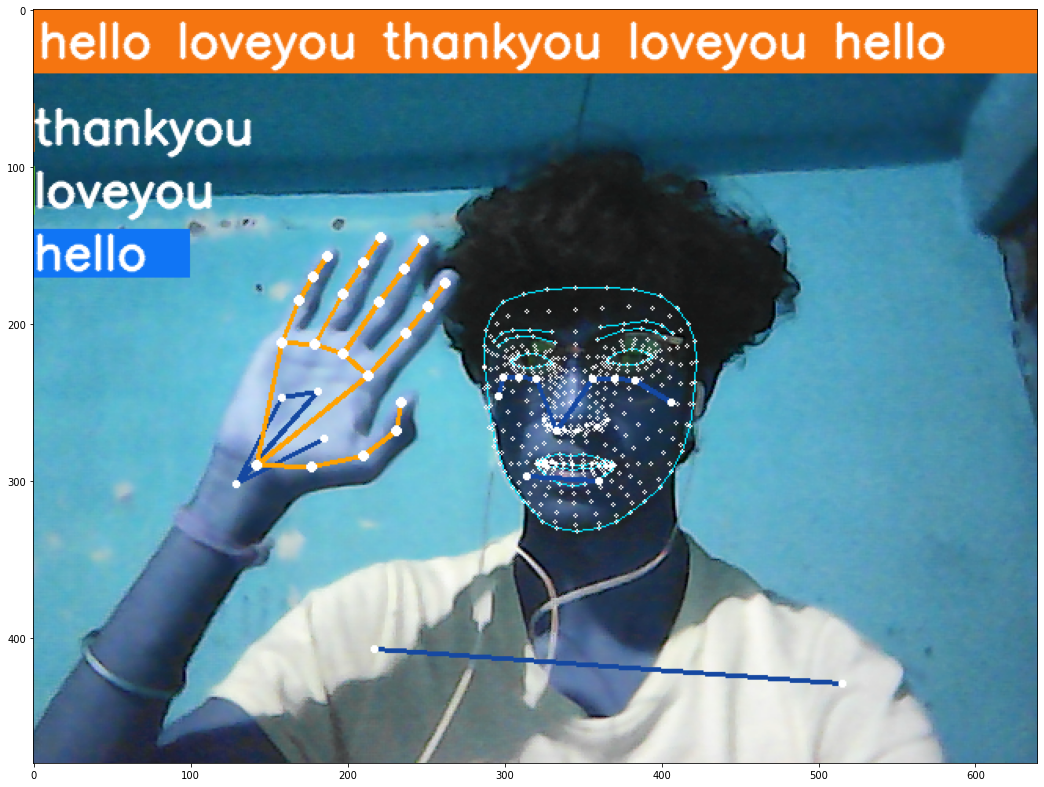

In [287]:
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, action, img, colors))

In [ ]:
sequence = []
sentence = []
predictionns = []
threshold = 0.9


cap = cv2.VideoCapture(0) # If cv2 camera not pop-up change the index number and you'll be on your way
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # Setting midiapip model and play with that confidence values
    while cap.isOpened():
        ret, frame = cap.read()
        img, results = mediapipe_detections(frame, holistic)
        print(results)
        draw_landmarks(img, results)
        keypoints = extract_keypoints(results)
#         sequence.insert(0, keypoints) 
        sequence.append(keypoints) # Use append method if insert method give you only two or one detection 
        sequence=sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if action[np.argmax(res)] != sentence[-1]:
                            sentence.append(action[np.argmax(res)])

                    else:
                        sentence.append(action[np.argmax(res)])


            if len(sentence) > 5:
                sentence = sentence [-5:]

            img = prob_viz(res, action, img, colors)
            
            
        cv2.rectangle(img, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(img, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                    
        cv2.imshow('openCV', img)           
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

In [251]:
cap.release()
cv2.destroyAllWindows()

In [466]:
np.expand_dims(x_test[0], axis=0).shape

(1, 30, 1662)

In [169]:
model.predict(np.expand_dims(x_test[0], axis=0))

array([[0.91800416, 0.07913366, 0.00286213]], dtype=float32)

In [249]:
res[np.argmax(res)] > threshold

False